In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from src.utils import mask_to_rgb
from src.datasets import ExcavatorDataset
from scripts.preprocessing import denoise_mask

In [3]:
train_dataset = ExcavatorDataset(return_type='image+mask+path', purpose='train')
cls_color = train_dataset.class_colors

Max in mask: 4
Min in mask: 0
Unique values in mask: [0 1 2 3 4]


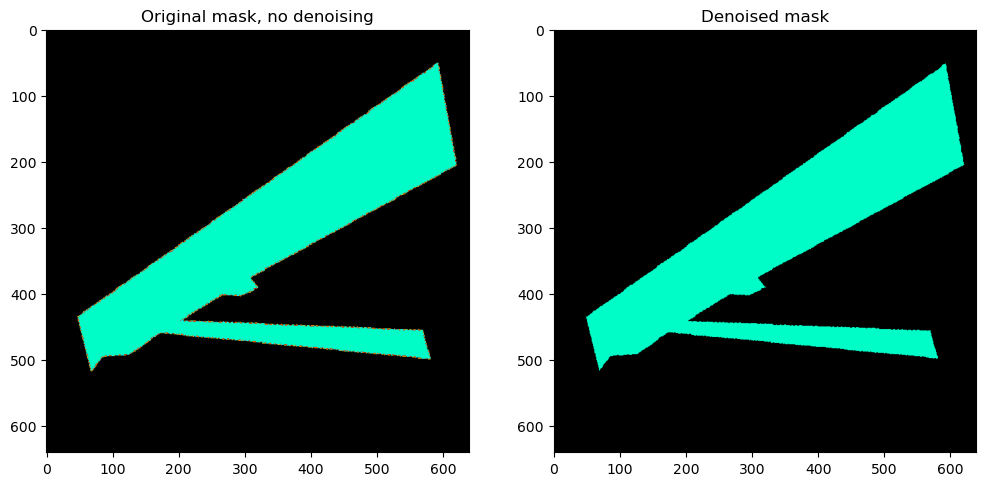

In [15]:
mask = cv2.imread(r'C:\Users\STUD_VuNhat\Downloads\Excavator_Semantic_Segmentation.v8i.png-mask-semantic\train\07afc9ffb88b74734ca2963876605d21_jpg.rf.b18d44fb7e72607028f711791ca53472_mask.png', cv2.IMREAD_GRAYSCALE)
#mask_rgb = mask_to_rgb(mask, cls_color)
print("Max in mask:", mask.max())
print("Min in mask:", mask.min())
print("Unique values in mask:", np.unique(mask))
mask_rgb = mask_to_rgb(mask, cls_color).permute(1, 2, 0)
denoised_mask = denoise_mask(mask, min_size=100)
mask_rgb_denoised = mask_to_rgb(denoised_mask, cls_color).permute(1, 2, 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask_rgb, cmap='gray')
plt.title("Original mask, no denoising")
plt.subplot(1, 2, 2)
plt.imshow(mask_rgb_denoised, cmap='gray')
plt.title("Denoised mask")
plt.show()

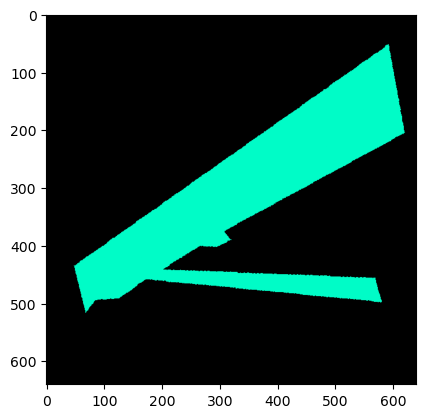

In [13]:

plt.imshow(mask_rgb_denoised)
plt.show()
